### 1. Write a python program for generating a composite signal (you could use sine or cosine waves). The parameters including the signal frequencies of 40 Hz, 80 Hz, 160 Hz with the amplitudes of 10, 20, and 40 respectively, and the signal length should be limited to 512 in samples.
### 2. Plot the generated signal.
### 3. Do standard sampling by following the Nyquist rate.
### 4. Perform under sampling and over sampling too. Use Subplot function to show the original, sampled, under sampled, and over sampled signal.
### 5. Then perform N=512 point DFT, show the magnitude and phase spectrum.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

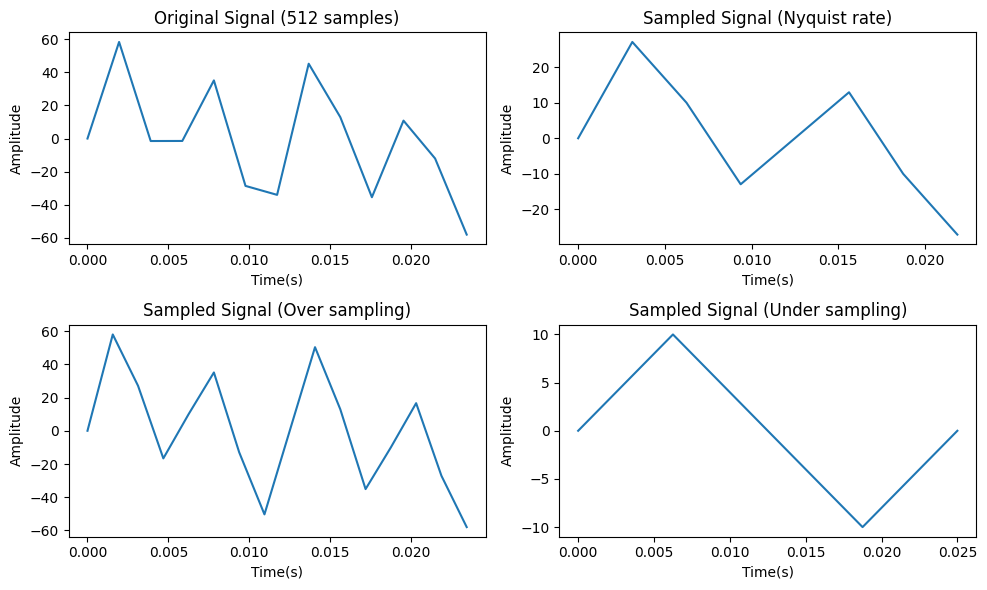

In [7]:
t = np.arange(0, 1, 1/512) # fs = 512
x = 10 * np.sin(2 * np.pi * 40 * t) + 20 * np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)
x = x[:13] # 1 cycle = 512/40 ~ 13 samples
t = t[:13]


plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Original Signal (512 samples)')

fn = 320 # Nyquist rate, fn = 2Fmax
t = np.arange(0, 1, 1/fn)
x = 10 * np.sin(2 * np.pi * 40 * t) + 20 * np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)
x = x[:8]
t = t[:8]

plt.subplot(2, 2, 2)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal (Nyquist rate)')

fs = 640 # Over sampling
t = np.arange(0, 1, 1/fs)
x = 10 * np.sin(2 * np.pi * 40 * t) + 20 * np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)
x = x[:16]
t = t[:16]

plt.subplot(2, 2, 3)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal (Over sampling)')

fs = 160 # Under sampling
t = np.arange(0, 1, 1/fs)
x = 10 * np.sin(2 * np.pi * 40 * t) + 20 * np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)
x = x[:5]
t = t[:5]

plt.subplot(2, 2, 4)
plt.plot(t, x)
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal (Under sampling)')

plt.tight_layout()
plt.show()

In [16]:
def dft(x_n, N):
    X_m = np.zeros(N, dtype=np.complex128)
    for m in range(N):
        for n in range(N):
            X_m[m] += x_n[n] * np.exp(-2j * np.pi * m * n / N)

    return X_m

In [14]:
def phase(X_m):
    X_phase = []
    for z in X_m:
        phase = cmath.phase(round(z.real) + round(z.imag) * 1j)
        X_phase.append(math.degrees(phase))

    return X_phase

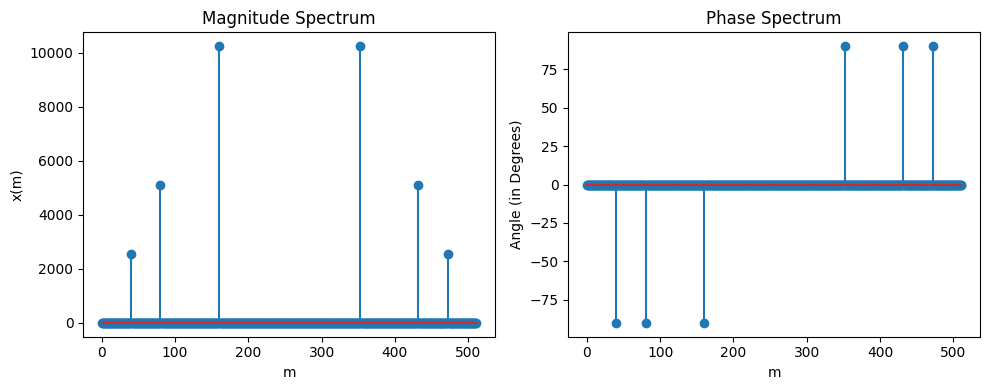

In [17]:
t = np.arange(0, 1, 1/512) # fs = 512
x = 10 * np.sin(2 * np.pi * 40 * t) + 20 * np.sin(2 * np.pi * 80 * t) + 40 * np.sin(2 * np.pi * 160 * t)

X_m = dft(x, len(x))

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.stem(np.abs(X_m))
plt.xlabel('m')
plt.ylabel('x(m)')
plt.title('Magnitude Spectrum')

X_phase = phase(X_m)

plt.subplot(1, 2, 2)
plt.stem(X_phase)
plt.xlabel('m')
plt.ylabel('Angle (in Degrees)')
plt.title('Phase Spectrum')

plt.tight_layout()
plt.show()
